# More Basics of Image Processing

## Basic Setup and Cloning the repository

In [ ]:
!git clone https://github.com/vanshg1729/cvit-workshop-2024.git

Cloning into 'cvit-workshop-2024'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (63/63), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 63 (delta 6), reused 60 (delta 6), pack-reused 0
Receiving objects: 100% (63/63), 4.71 MiB | 12.62 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import os
import sys

REPO_DIR = "/content/cvit-workshop-2024"
assert os.path.exists(REPO_DIR), f"{REPO_DIR} does not exists"

IMAGES_DIR = os.path.join(REPO_DIR, "day1/images")
print(f"{IMAGES_DIR}, exists = {os.path.exists(IMAGES_DIR)}")

/content/cvit-workshop-2024/day1/images, exists = True


In [3]:
# Importing basic libraries
import numpy as np
import copy
import cv2
from google.colab.patches import cv2_imshow
import math
from collections import defaultdict
from matplotlib import pyplot as plt

In [4]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

## Erosion and Dilation

### Isolate the structure
Try to isolate the middle square `structure.jpeg` so that it looks like `structure_isolated.jpeg`

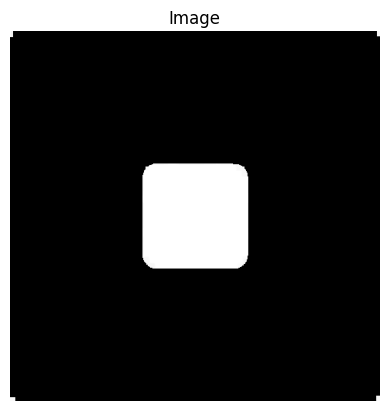

In [16]:
img = cv2.imread(os.path.join(IMAGES_DIR, "structure.jpeg"),0)
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(img, kernel, iterations=8)
show_image(img_erosion)

Shape of grayscale image : (486, 486)


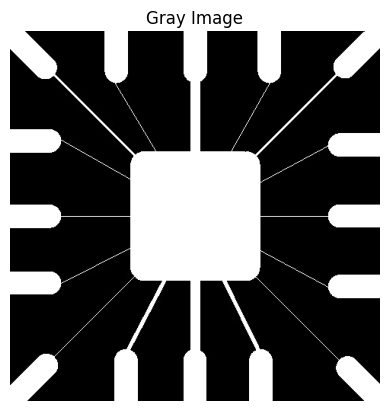

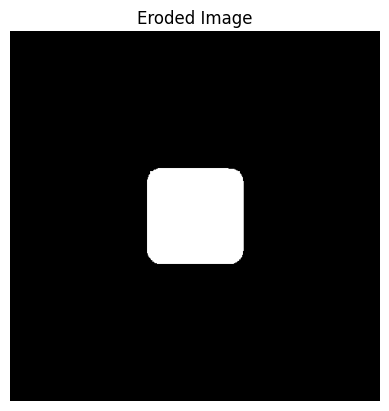

In [17]:
#@title Solution

# Load the input image
img_path = os.path.join(IMAGES_DIR, "structure.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(f"Shape of grayscale image : {gray_image.shape}")
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
#
ksize = 45 # kernel size for Erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))

# Apply erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
show_image(eroded_image, "Eroded Image")

### Fix the Broken Text
Read `text_broken.jpeg` and try to fix the broken characters so it looks closer to `text_fixed.jpeg`

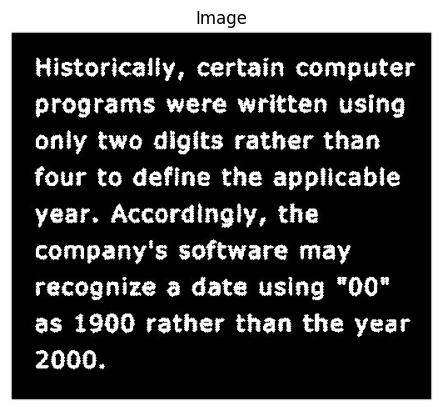

In [22]:
img = cv2.imread(os.path.join(IMAGES_DIR, "text_broken.jpeg"),0)
kernel = np.ones((3, 3), np.uint8)
kernel[0,0]=0
kernel[2,0]=0
kernel[0,2]=0
kernel[2,2]=0
img_dilation = cv2.dilate(img, kernel, iterations=1)
show_image(img_dilation)

In [ ]:
#@title Solution

# Load the input image
img_path = os.path.join(IMAGES_DIR, "text_broken.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))

# Apply dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
show_image(dilated_image, "Image after dilation")

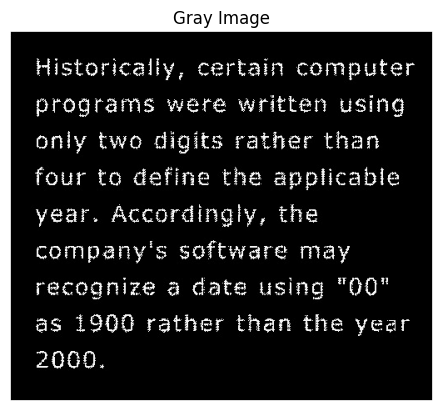

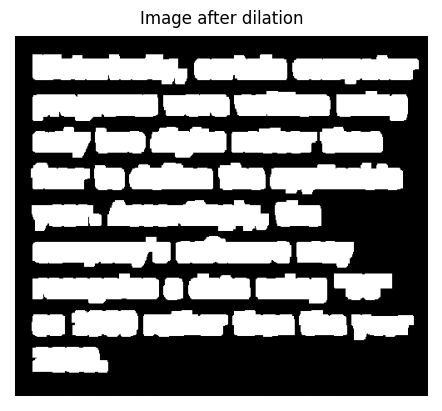

In [26]:
#@title Segmenting Words

# You can also segment the words if use dilate with a bigger kernel size

# Load the input image
img_path = os.path.join(IMAGES_DIR, "text_broken.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 11
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))

# Apply dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
show_image(dilated_image, "Image after dilation")


### Remove Noise from fingerprint
Try to remove the background noise from `fingerprint_noise.jpeg` while preserving as much of the fingerprint as possible.

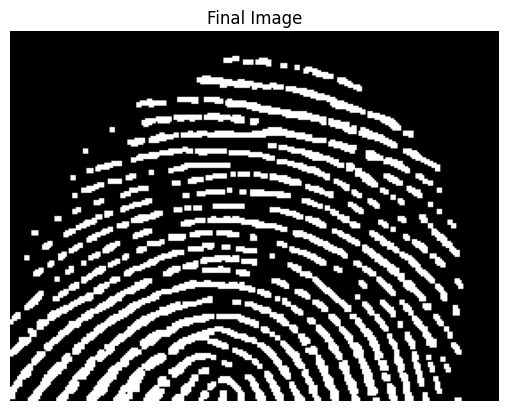

In [47]:
img_path = os.path.join(IMAGES_DIR, "fingerprint_noise.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
#
ksize =3 # kernel size for Erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))

# Apply erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
eroded_image1 = cv2.dilate(eroded_image, kernel, iterations=1)
show_image(eroded_image1, "Final Image")

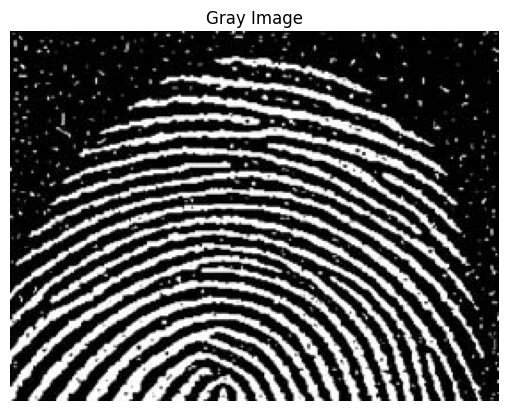

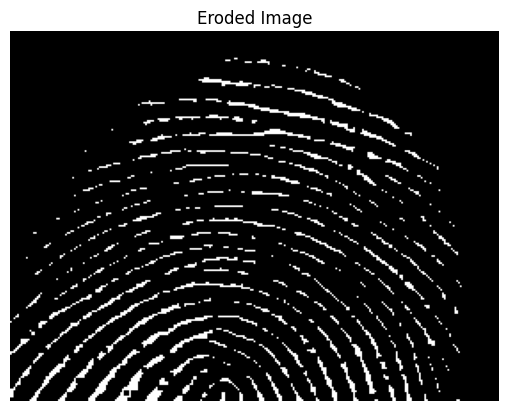

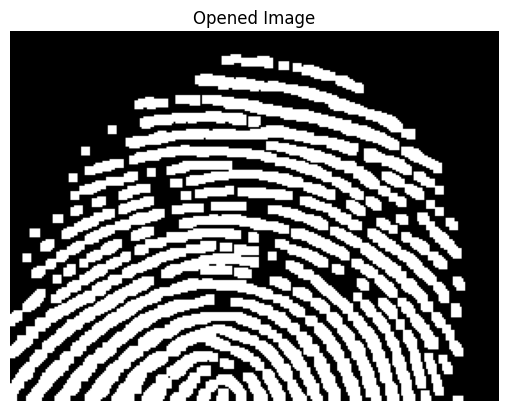

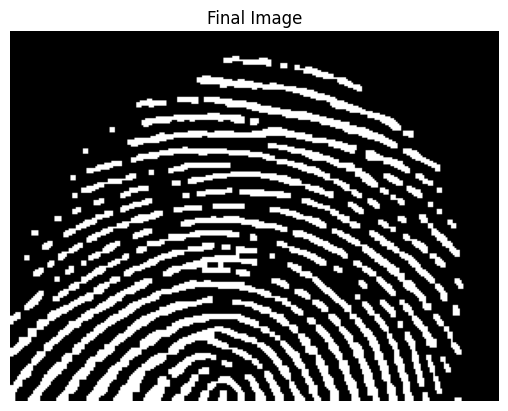

In [27]:
#@title Solution
img_path = os.path.join(IMAGES_DIR, "fingerprint_noise.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 3
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize))  # k x k rectangle structuring element

# Apply erosion
eroded_image = cv2.erode(binary_image, kernel, iterations=1)
show_image(eroded_image, "Eroded Image")

# Apply dilation
opened_image = cv2.dilate(eroded_image, kernel, iterations=2)
show_image(opened_image, "Opened Image")

# Apply erosion
final_image = cv2.erode(opened_image, kernel, iterations=1)
show_image(final_image, "Final Image")

### Fill the Holes
Fill the holes in `blobs.jpeg` without changing the size of the blobs roughly.

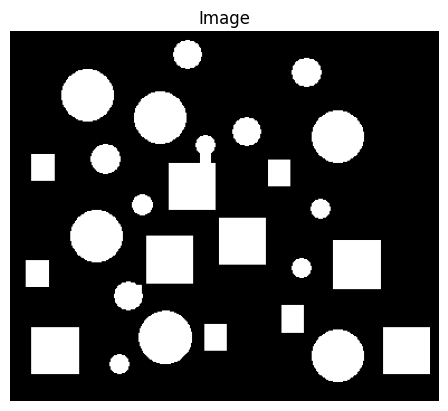

In [58]:
img = cv2.imread(os.path.join(IMAGES_DIR, "blobs.jpeg"),0)
_, binary_image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((5, 5), np.uint8)
img_dilation = cv2.dilate(binary_image, kernel, iterations=2)
img_final=cv2.erode(img_dilation,kernel,iterations=2)
show_image(img_final)

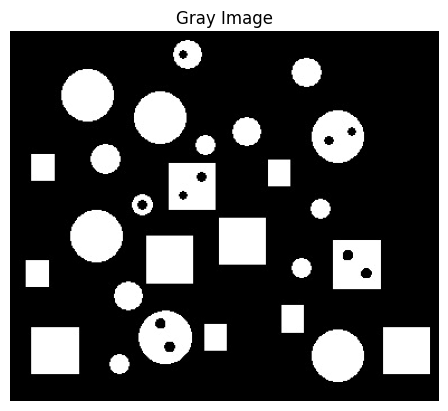

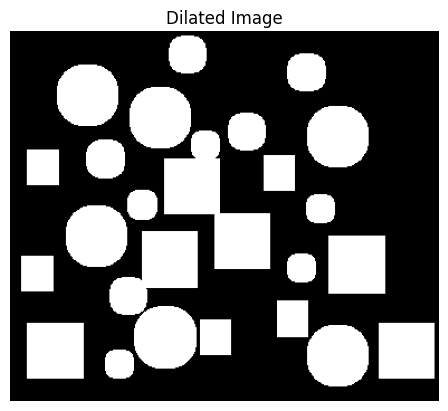

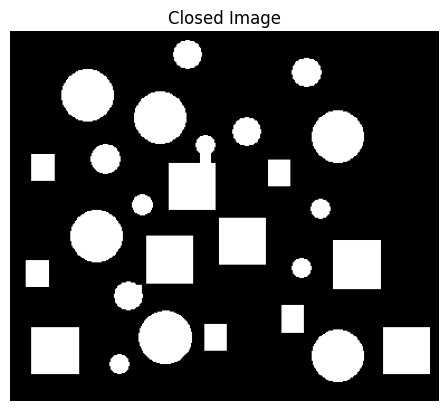

In [43]:
#@title Solution

# Load the input image
img_path = os.path.join(IMAGES_DIR, "blobs.jpeg")
image = cv2.imread(img_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_image(gray_image, "Gray Image")

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
ksize = 9
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (ksize, ksize)) # k x k rectangle structuring element

# Apply dilation
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
show_image(dilated_image, "Dilated Image")

# Apply erosion
closed_image = cv2.erode(dilated_image, kernel, iterations=1)
show_image(closed_image, "Closed Image")


## Gradients, Edges and Blurring

### Sobel Filter
Apply Sobel filter in X and Y directions on `lotus.jpg` and display it's result. Also find the magnitude of the gradient and plot that as well.

There are values greater than 255 in the gradient image.


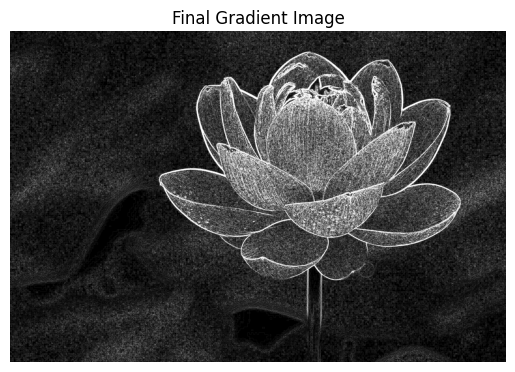

In [84]:
img = cv2.imread(os.path.join(IMAGES_DIR, "lotus.jpg"))
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(img1,cv2.CV_32F,1,0,ksize=-1)
sobely = cv2.Sobel(img1,cv2.CV_32F,0,1,ksize=-1)
gradient = np.sqrt((sobelx * sobelx) + (sobely * sobely))
if np.any(gradient > 255):
    print("There are values greater than 255 in the gradient image.")
gradient = cv2.convertScaleAbs(gradient)
show_image(gradient, "Final Gradient Image")


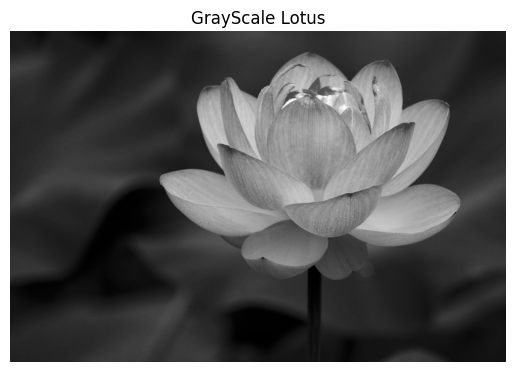

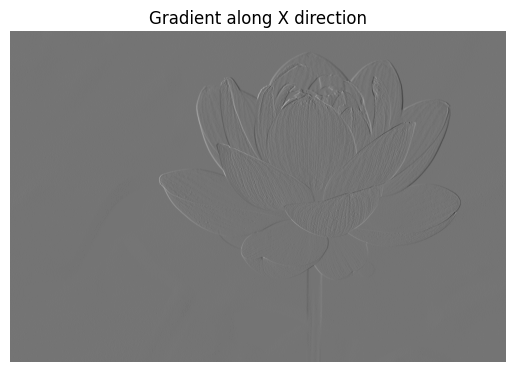

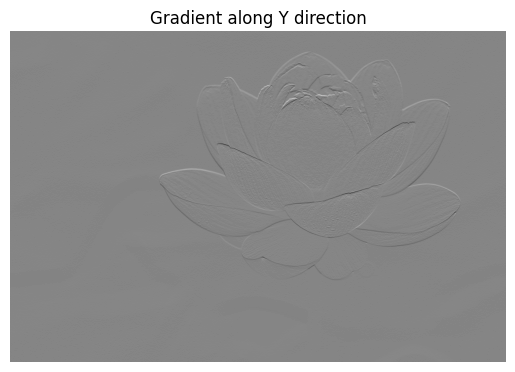

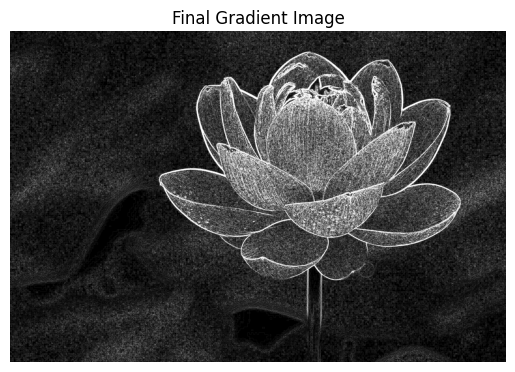

In [57]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lotus.jpg")
lotus_image = cv2.imread(img_path)
lotus_gray = cv2.cvtColor(lotus_image, cv2.COLOR_BGR2GRAY)
show_image(lotus_gray, "GrayScale Lotus")

# Gradient along X direction
gradX = cv2.Sobel(lotus_gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
show_image(gradX, "Gradient along X direction")

# Gradient along Y direction
gradY = cv2.Sobel(lotus_gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)
show_image(gradY, "Gradient along Y direction")

# Absolute gradient
gradient = np.sqrt((gradX * gradX) + (gradY * gradY))
gradient = cv2.convertScaleAbs(gradient)
show_image(gradient, "Final Gradient Image")


### Blurring
Apply Gaussian blurring on `lotus.jpg`

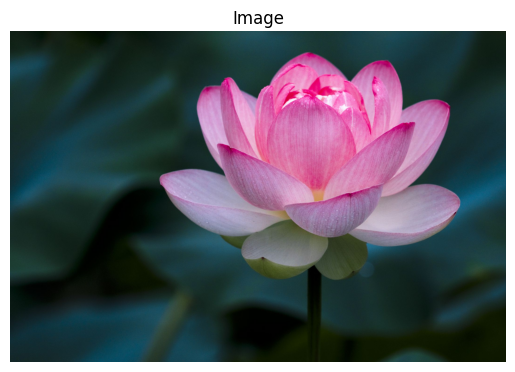

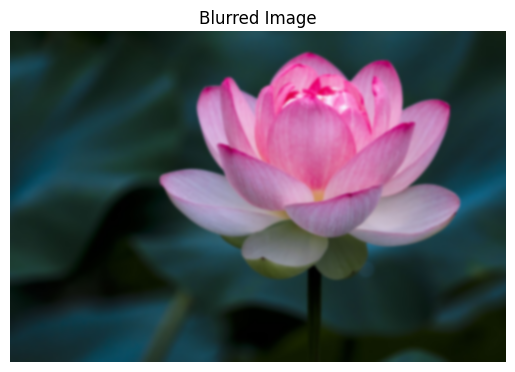

In [74]:
img_path = os.path.join(IMAGES_DIR, "lotus.jpg")
lotus_image = cv2.imread(img_path)
lotus_image=cv2.cvtColor(lotus_image,cv2.COLOR_BGR2RGB)
show_image(lotus_image)
ksize = 31
lotus_blurred = cv2.GaussianBlur(lotus_image, (ksize, ksize), 0)
show_image(lotus_blurred, "Blurred Image")

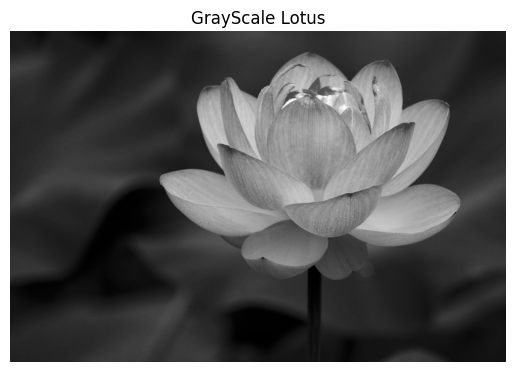

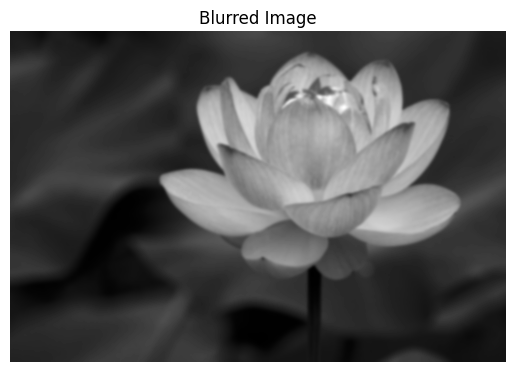

In [60]:
#@title Solution

img_path = os.path.join(IMAGES_DIR, "lotus.jpg")
lotus_image = cv2.imread(img_path)
lotus_gray = cv2.cvtColor(lotus_image, cv2.COLOR_BGR2GRAY)
show_image(lotus_gray, "GrayScale Lotus")

# Applying Gaussian Blur
ksize = 31
lotus_blurred = cv2.GaussianBlur(lotus_gray, (ksize, ksize), 0)
show_image(lotus_blurred, "Blurred Image")